# Cvičenie 7: Nekontrolované učenie

Doteraz ste používali iba kontrolované učenie, čo znamená, že učiaci sa model mal k dispozícii nielen vstupné údaje ale aj očakávané výstupné údaje a počas trénovania dostával informáciu o tom, či sa zlepšuje alebo nie. Aj keď kontrolované učenie je dnes najpoužívanejšou metódou vo vývoji nových UI modelov, má svoje nevýhody, a to hlavne to, že veľmi často umelú inteligenciu chceme použiť na riešenie problémov v ktorých nepoznáme očakávané výstupy.

Na dnešnom cvičení sa pozrieme na to, ako funguje klasifikácia v nekontrolovanom učení. Tento problém súvisí aj s najčastejším príkladom použitia nekontrolovaného učenia, a to zhlukovaním (*clustering*). To znamená, že sa nesnažíme rozdeliť príznakový priestor pomocou priamok a kriviek a takto oddeliť od seba jednotlivé triedy, ale na základe podobnosti údajov ich zaradíme do menších skupín (zhlukov) a predikciu vykonáme pomocou určenia podobnosti vstupných údajov k údajom v jednotlivých zhlukoch.

## 1. Zhlukovanie pomocou *k-means*

Základný algoritmus pre clustering pomocou nekontrolovaného učenia je algoritmus *k-means*, ktorý vytvorí *k* zhlukov z daného datasetu iteratívnym procesom. Postup algoritmu môžeme popísať nasledovne:

1. z datasetu sa náhodne vyberie *k* prvkov (počet špecifikuje používateľ), ktoré sa stanú stredom jednotlivých zhlukov
2. na základe jeho vzdialenosti od centier zhlukov sa každý príklad z datasetu pridelí do niektorého zo zhlukov
3. vypočítajú sa nové stredy zhlukov ako priemerná pozícia všetkých príkladov v danom zhluku
4. kroky 2 a 3 sa opakujú až dovtedy, kým nedôjde ku konvergencii.

Výstupom učenia je klasifikátor, ktorý príklad zoradí do niektorého zhluku na základe jeho vzdialenosti od stredu zhluku. Výstupom je takisto informácia o zhlukoch: kde sa nachádza ich centrum. Keďže výber v prvom kroku je náhodný, viacnásobné spustenie trénovania nám dáva rozlišné výsledky. Algoritmus teraz implementujeme pre dataset Iris, aby sme porovnali jeho úspešnosť s kontrolovaným učením. Celý kód nájdete [tu](https://github.com/DominikVranay/neural-networks-course/blob/79228faa8ebdde1ebf2e3970a5ee97c113101052/labs/sources/lab08/lab8-k-means.py) alebo ho môžete postupne implementovať.

## 1.1. Načítanie datasetu

Dnes použijeme iný spôsob na načítanie datasetu. Keďže Iris je štandardný dataset, ktorý sa používa veľmi často, obsahujú ho viaceré knižnice pre strojové učenie. My ho načítame z knižnice `sklearn` (scikit-learn), ktorú importneme spolu s ďalšími modulmi:

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

`KMeans` je náš algoritmus implementovaný v knižnici, a `matplotlib.pyplot` neskôr použijeme na vizualizáciu datasetu, aby sme vedeli porovnať očakávané hodnoty s výsledkami predikcie.

Samotný dataset Iris načítame príkazom

In [2]:
iris_df = datasets.load_iris()

Na rozdiel od `pandas`, ktorý celý dataset načíta do jedného `DataFrame`, v `scikit-learn` máme dataset rozdelený na dve časti: vstupné údaje a očakávané výstupné údaje. Vstupné údaje nájdeme pod premennou `data`, výstupné pod `target`:

In [3]:
input_data = iris_df.data
selected_data = iris_df.data[:, [0, 2]]

output_data = iris_df.target

`selected_data` sme vytvorili pre pokus, kde na trénovanie použijeme iba dva príznaky: *sepal length* a *sepal width*, ktoré načítame do ďalších premenných pre neskoršie použitie:

In [4]:
s_length = iris_df.data[:, 0]  # sepal length
s_width = iris_df.data[:, 2]  # sepal width

## 1.2. Trénovanie modelu

Trénovanie *k-means* je veľmi jednoduchý v knižnici `scikit-learn`, skladá sa len z dvoch krokov. Najprv potrebujeme vytvoriť model a špecifikovať počet hľadaných zhlukov, a následne natrénujeme model pomocou nejakých dát (metóda `fit`):

C:\Users\rposa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1.9440683605553886
0.855577769526653
0.6480304904934532
0.5573847727333369
0.5096521951118317
0.4670733963396458
0.4435848138274872
0.4108676831489339
0.3964482455875726
0.3855861656936782


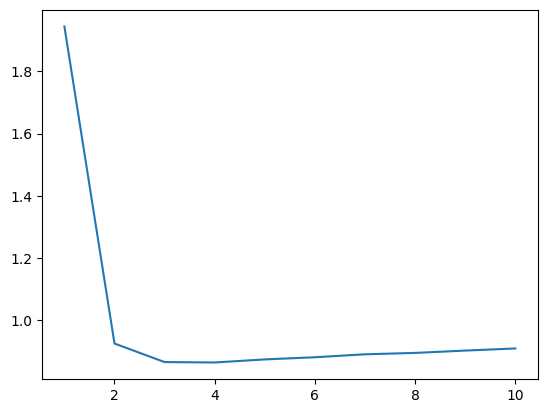

In [5]:
dis = []
for i in range(1, 11):
    model = KMeans(n_clusters=i) #, n_init='auto')
    model.fit(input_data)
    d = model.transform(input_data).min(axis=1).mean()
    print(d)
    dis.append(d**(1/i))
plt.plot(range(1, 11), dis)

In [6]:
model = KMeans(n_clusters=3) #, n_init='auto')

model.fit(input_data)

KMeans(n_clusters=3)

Ako môžete vidieť, model natrénujeme na celom datasete (použijeme všetky príznaky) a v porovnaní s kontrolovaným učením nešpecifikujeme očakávané výstupné hodnoty pri trénovaní.

## 1.3. Testovanie modelu

Presnosť modelu otestujeme vizualizáciou aby sme jednoznačne videli rozdiely medzi očakávanými výstupmi a výstupmi modelu. Keďže príznakový priestor má teraz štyri dimenzie, na vizualizáciu použijeme iba pred tým vybrané príznaky *sepal length* a *sepal width* (výstup ale nemeníme). Vo vizualizácii príklady budú reprezentované ako body v dvojdimenzionálnom priestore a ich farba bude reprezentovať triedu. Na priradenie farby ku triede definujeme pomocnú funkciu `color_code`:

In [7]:
def color_code(targets):
    code = {
        0: 'red',
        1: 'green',
        2: 'blue'
    }

    return [code[target] for target in targets]

0.6480304904934532


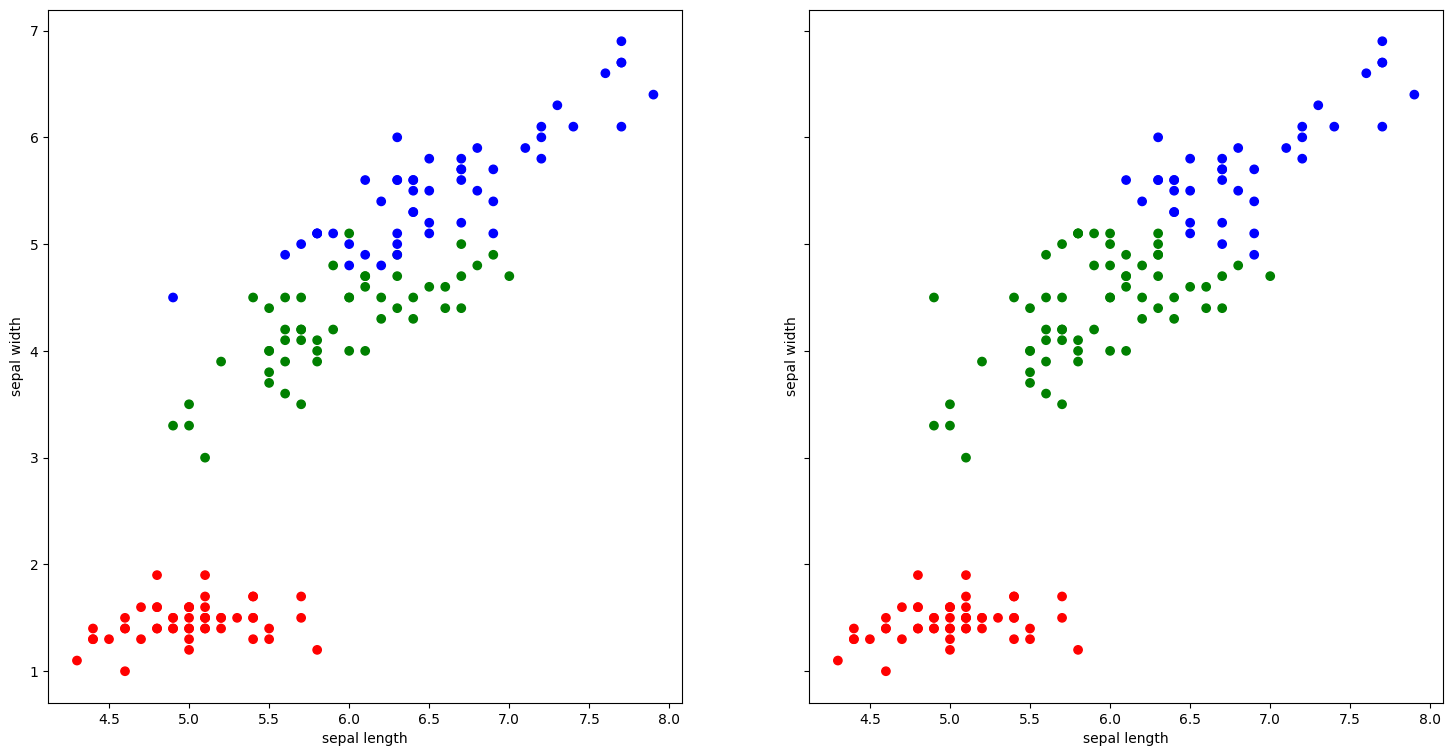

In [8]:
model1 = KMeans(n_clusters=3) #, n_init='auto')
model1.fit(input_data)

model2 = KMeans(n_clusters=3) #, n_init='auto')
model2.fit(input_data)

print(model2.transform(input_data).min(axis=1).mean())

all_predictions1 = model1.predict(input_data)
all_predictions2 = model2.predict(input_data)

fig, axs = plt.subplots(1, 2, figsize=(18, 9), sharey=True)
axs[0].scatter(s_length, s_width, c=color_code(iris_df.target))
axs[0].set_xlabel("sepal length")
axs[0].set_ylabel("sepal width")

axs[1].scatter(s_length, s_width, c=color_code(all_predictions1))
axs[1].set_xlabel("sepal length")
axs[1].set_ylabel("sepal width")

plt.show()

Výstupom môže byť takýto graf, kde vľavo vidíte reálny dataset a vpravo výstup zhlukovania:

![Výsledky k-means](https://github.com/DominikVranay/neural-networks-course/blob/master/labs/sources/lab08/8.1-k-means-results.png?raw=1)

Z grafu je jasné, že klasifikácia nie je úplne presná, a zároveň aj jednotlivé triedy sú pomiešané, čo je spôsobené náhodným výberom prvých jedincov do daných zhlukov. Tento jav môžete spozorovať ak kód spustíte niekoľkokrát.

## 1.4. Oprava datasetu

V tomto kroku vašou úlohou je zistiť, ako ovplyvní výsledok ak použijete iba dva príznaky na trénovanie a predikciu. Môžete použiť ľubovoľné dva príznaky, alebo už vybrané príznaky *sepal length* a *sepal width*.

## 2. Kohonenove siete

Kohonenove siete sú modelom nekontrolovaného učenia v neurónových sieťach, tzv. samoorganizujúce sa mapy (self-organizing maps, SOM). Pri trénovaní sa použije paradigma konkurenčného učenia, avšak s viacerými víťazmi, to znamená, že naraz sa aktualizujú váhy viacerých neurónov.

Základom Kohonenovej siete je Kohonenova vrstva, v ktorej sú neuróny usporiadané do geometrického útvaru. Takéto usporiadanie je dôležité kvôli tomu, aby sme vedeli identifikovať susedov neurónov. Táto susednosť potom určuje spôsob aktualizácie váh - susedné neuróny budú mať podobné hodnoty váh. Mieru susednosti určuje funkcia susednosti $\Lambda_{ij}$.

Zmena váhy sa vypočítava ako:

$\Delta w_{ij}(t) = - \gamma \Lambda_{ij}(w_{ij}(t) - x_{j}^{k}(t))$

A aktualizovaná hodnota váhy:

$w_{ij}(t + 1) = w_{ij}(t) + \gamma \Lambda_{ij}(x_{j}^{k}(t) - w_{ij}(t))$

Proces učenia môžeme vizualizovať nasledovne:

![Kohonen process](https://upload.wikimedia.org/wikipedia/commons/3/35/TrainSOM.gif)